<a href="https://colab.research.google.com/github/anaghaaaa/FYP-/blob/main/hw1_tennis_weather_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset: tennis weather dataset in kaggle [Click here for the dataset](https://www.kaggle.com/datasets/pranavpandey2511/tennis-weather)

importing necessary libraries: NumPy for numerical computations, Pandas for data manipulation, and train_test_split from Scikit-Learn for splitting the data into training and testing sets.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


reads a CSV file named 'tennis.csv' and loads it into a Pandas DataFrame called data.

In [4]:
data = pd.read_csv('/content/tennis.csv')


It prints the column names of the DataFrame.

In [5]:

print(data.columns)


Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')


gives the dimension of the dataframe

In [6]:
print(data.shape)

(14, 5)


This separates the features (X) and the target variable (y) from the DataFrame.

In [7]:
X = data.drop(columns=['play'])
y = data['play']


Printing the features(X) from the dataframe 'Data'

In [8]:
print(X)

     outlook  temp humidity  windy
0      sunny   hot     high  False
1      sunny   hot     high   True
2   overcast   hot     high  False
3      rainy  mild     high  False
4      rainy  cool   normal  False
5      rainy  cool   normal   True
6   overcast  cool   normal   True
7      sunny  mild     high  False
8      sunny  cool   normal  False
9      rainy  mild   normal  False
10     sunny  mild   normal   True
11  overcast  mild     high   True
12  overcast   hot   normal  False
13     rainy  mild     high   True


Printing the target variable (y)

In [9]:
print(y)

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object


X_encoded is created by applying one-hot encoding to the feature columns.

In [10]:
X_encoded = pd.get_dummies(X)


here, we get the dimensions of X_encoded

In [11]:
X_encoded.shape

(14, 9)

printing X_encoded. i.e. the values of X after one hot encoding

In [12]:
print(X_encoded)

    windy  outlook_overcast  outlook_rainy  outlook_sunny  temp_cool  \
0   False                 0              0              1          0   
1    True                 0              0              1          0   
2   False                 1              0              0          0   
3   False                 0              1              0          0   
4   False                 0              1              0          1   
5    True                 0              1              0          1   
6    True                 1              0              0          1   
7   False                 0              0              1          0   
8   False                 0              0              1          1   
9   False                 0              1              0          0   
10   True                 0              0              1          0   
11   True                 1              0              0          0   
12  False                 1              0              0       

The data is split into training and testing sets using the train_test_split function. 80% of the data is used for training (X_train and y_train), and 20% is used for testing (X_test and y_test).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


The Pandas DataFrames are converted into NumPy arrays for further computations.

In [14]:

# Convert the DataFrames to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)


 str_to_float to convert strings 'yes' and 'no' to 1.0 and 0.0, Used later for the target attribute

In [15]:
# Define a custom function to convert strings to floats
def str_to_float(s):
    if s == 'yes':
        return 1.0
    elif s == 'no':
        return 0.0
    else:
        raise ValueError('Could not convert string to float: {}'.format(s))

# Convert the target variable to floats
y_train_floats = y_train.apply(str_to_float)


sigmoid for the sigmoid activation function, and sigmoid_derivative for the derivative of the sigmoid function is created here

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x.astype(float)))


In [17]:
def sigmoid_derivative(x):
    return x * (1 - x)


We define the neural network architecture: input, hidden, and output layer sizes.

In [18]:
input_size = X_train.shape[1]
hidden_size = 1
output_size = 1


In [19]:
print(input_size)

9


Random initial weights are generated for connections between input-hidden and hidden-output layers.

In [20]:
np.random.seed(0)
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))


the learning rate in neural networks determines the rate at which the model's parameters are updated during training, impacting the convergence speed and stability of the optimization process.


"epoch" in neural networks represents a single iteration through the entire training dataset during the learning process. Each epoch allows the neural network to update its parameters based on the entire dataset, helping it learn and improve its performance over time.

In [21]:
learning_rate = 0.01
epochs = 5


In [22]:
X_train = np.array(X_train)


printing X_train

In [23]:
print(X_train)

[[False 1 0 0 0 1 0 0 1]
 [True 0 1 0 1 0 0 0 1]
 [False 0 0 1 1 0 0 0 1]
 [False 1 0 0 0 1 0 1 0]
 [True 0 0 1 0 1 0 1 0]
 [True 0 1 0 0 0 1 1 0]
 [False 0 1 0 1 0 0 0 1]
 [False 0 0 1 0 0 1 1 0]
 [True 0 0 1 0 0 1 0 1]
 [False 0 1 0 0 0 1 1 0]
 [True 1 0 0 1 0 0 0 1]]


The training data is reshaped to match the network's expected input format: samples, timesteps, features.

printing X_train's dimensions

In [24]:
print(X_train.shape)

(11, 9)


In [25]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))


In [26]:
print(X_train)

[[[False 1 0 0 0 1 0 0 1]]

 [[True 0 1 0 1 0 0 0 1]]

 [[False 0 0 1 1 0 0 0 1]]

 [[False 1 0 0 0 1 0 1 0]]

 [[True 0 0 1 0 1 0 1 0]]

 [[True 0 1 0 0 0 1 1 0]]

 [[False 0 1 0 1 0 0 0 1]]

 [[False 0 0 1 0 0 1 1 0]]

 [[True 0 0 1 0 0 1 0 1]]

 [[False 0 1 0 0 0 1 1 0]]

 [[True 1 0 0 1 0 0 0 1]]]


In [27]:
print(X_train.shape)

(11, 1, 9)


In [28]:
# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    output = np.dot(hidden_output, weights_hidden_output)
    output = sigmoid(output)

    # Calculate error and deltas for backpropagation
    error = y_train_floats.values.reshape(-1, 1) - output
    d_output = error * sigmoid_derivative(output)
    d_hidden_output = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)

    # Print error for each iteration within the epoch
    for iteration, err in enumerate(np.mean(np.abs(error), axis=1)):
        print(f"Iteration {iteration + 1}/{X_train.shape[0]} - Error: {err[0]:.6f}")  # Notice the [0]



Epoch 1/5
Iteration 1/11 - Error: 0.513290
Iteration 2/11 - Error: 0.511829
Iteration 3/11 - Error: 0.511158
Iteration 4/11 - Error: 0.512969
Iteration 5/11 - Error: 0.512356
Iteration 6/11 - Error: 0.511472
Iteration 7/11 - Error: 0.511530
Iteration 8/11 - Error: 0.510767
Iteration 9/11 - Error: 0.511560
Iteration 10/11 - Error: 0.511157
Iteration 11/11 - Error: 0.512463
Epoch 2/5
Iteration 1/11 - Error: 0.513290
Iteration 2/11 - Error: 0.511829
Iteration 3/11 - Error: 0.511158
Iteration 4/11 - Error: 0.512969
Iteration 5/11 - Error: 0.512356
Iteration 6/11 - Error: 0.511472
Iteration 7/11 - Error: 0.511530
Iteration 8/11 - Error: 0.510767
Iteration 9/11 - Error: 0.511560
Iteration 10/11 - Error: 0.511157
Iteration 11/11 - Error: 0.512463
Epoch 3/5
Iteration 1/11 - Error: 0.513290
Iteration 2/11 - Error: 0.511829
Iteration 3/11 - Error: 0.511158
Iteration 4/11 - Error: 0.512969
Iteration 5/11 - Error: 0.512356
Iteration 6/11 - Error: 0.511472
Iteration 7/11 - Error: 0.511530
Iteration

In [29]:
print("Epoch:", epoch, "Error:", np.mean(np.abs(error)))

Epoch: 4 Error: 0.5118682712739682



#for backpropagation - do later
 # Update weights for the hidden-to-output layer
    weights_hidden_output += np.dot(hidden_output.T, d_output) * learning_rate

    # Update weights for the input-to-hidden layer
    weights_input_hidden += np.dot(X_train.reshape(-1, input_size).T, d_hidden_output) * learning_rate

In [30]:
# Make predictions on the test set

hidden_input_test = np.dot(X_test, weights_input_hidden)
hidden_output_test = sigmoid(hidden_input_test)
predictions = np.dot(hidden_output_test, weights_hidden_output)
predictions = sigmoid(predictions)


In [31]:
# Print some example predictions
print(predictions[:10])


[[0.45740614]
 [0.45546738]
 [0.45569269]]


Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix

# Round the predictions to binary values (0 or 1)
rounded_predictions = (predictions > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.apply(str_to_float), rounded_predictions)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1 0]
 [2 0]]


True Positive (TP): 1
True Negative (TN): 0
False Positive (FP): 0
False Negative (FN): 2

 the model seems to have predicted the positive class (play tennis) correctly for 1 instance, but it misclassified 2 instances of the negative class (don't play tennis) as positive.

The low accuracy and high number of false negatives suggest that the model's performance might be poor.

In [33]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("Accuracy:", accuracy)


Accuracy: 0.3333333333333333


An accuracy of 0.3333333333333333 means that your model correctly predicted the class labels for approximately 33.33% of the total instances in your dataset. In other words, out of all the instances in the dataset, about 33.33% of them were classified correctly by your model.

Plotting confusion matrix

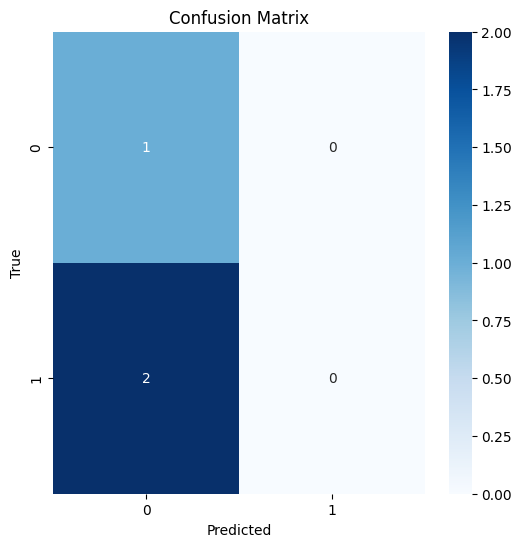

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()